# Prediction using KNN algorithmn

## Task - Create a model which predict the target classes.

### 1. Import library

We will use the libraries like pandas, numpy, matplotlib, and sklearn

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

### 2. Reading data

In [2]:
data=pd.read_csv('classified data',index_col=False)
data.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


##### Note: Here you can see the columns features names are hidden but the target class are given.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1000 non-null   int64  
 1   WTT           1000 non-null   float64
 2   PTI           1000 non-null   float64
 3   EQW           1000 non-null   float64
 4   SBI           1000 non-null   float64
 5   LQE           1000 non-null   float64
 6   QWG           1000 non-null   float64
 7   FDJ           1000 non-null   float64
 8   PJF           1000 non-null   float64
 9   HQE           1000 non-null   float64
 10  NXJ           1000 non-null   float64
 11  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 93.8 KB


#### From the above command we can see the there is no null values present inside the dataset.

### 3. Using Scaler function

On KNN classifier we need to fit the variables on small scale because the larger scale variables can effect the distance between the observation.

Hence we will use standarscaler function it will transform the larger values into smaller values.

In [4]:
x=data.drop('TARGET CLASS',axis=1)
y=data['TARGET CLASS']

In [5]:
scaler=StandardScaler()

In [6]:
scaler.fit(x)
scaled_features=scaler.transform(x)

In [7]:
data_features=pd.DataFrame(scaled_features,columns=data.columns[:-1])
data_features.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### 4. Preparing data for the ML model

In [8]:
x_train,x_test,y_train,y_test=train_test_split(scaled_features,y, test_size=0.3)
print(f'Training data {x_train.shape}')
print(f'Training target {y_train.shape}')
print(f'Testing data {x_test.shape}')
print(f'Testing target {y_test.shape}')

Training data (700, 11)
Training target (700,)
Testing data (300, 11)
Testing target (300,)


##### Note: Here our training data is 700 and the testing data is 300.

### 5. Training the model

Initially we will use the K value equal to 1, later we will determine for what value of k the model would be ideal.

In [9]:
model=KNeighborsClassifier(n_neighbors=1)
model.fit(x_train,y_train)
print('Model is trained')

Model is trained


### 6. Testing the model

For testing the model we will feed our test data to the model and compare the actual value vs predicted value.

In [10]:
prediction=model.predict(x_test)

In [22]:
df=pd.DataFrame({'actual value':y_test,'predicted value':prediction})
df.head()

,actual value,predicted value
951,0,0
711,0,0
527,0,0
718,1,1
751,1,1


### 7. Checking the accuracy

In [12]:
print(confusion_matrix(y_test,prediction))

[[133  18]
 [ 16 133]]


In [13]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89       151
           1       0.88      0.89      0.89       149

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



### 8. Finding the value of K

Text(0, 0.5, 'Error rate')

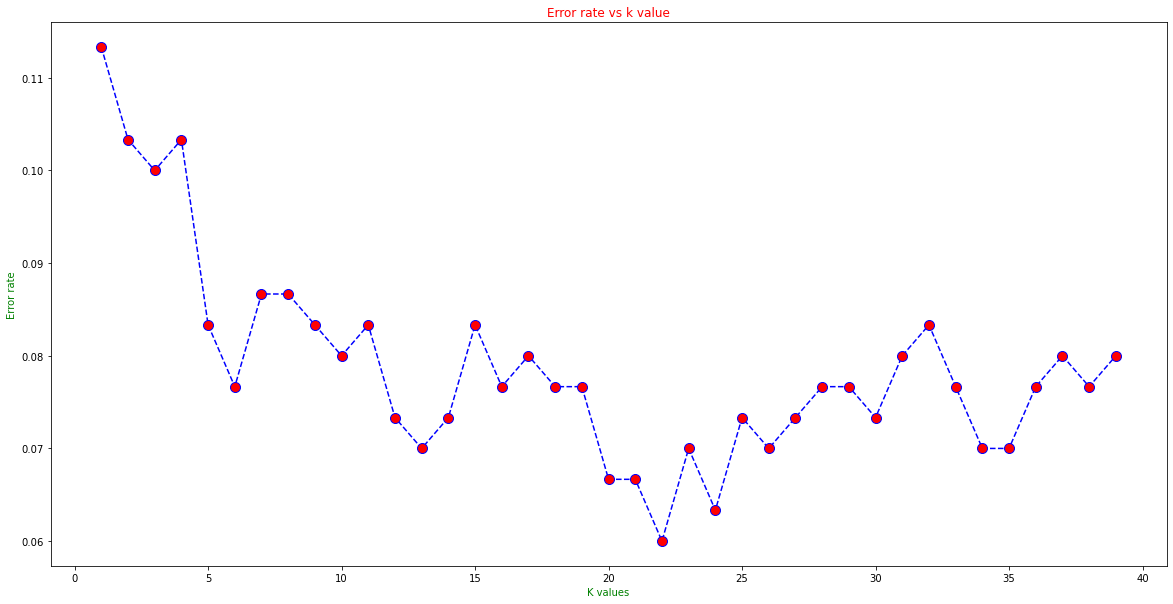

In [14]:
error_rate=[]
for i in range(1,40):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    prediction=model.predict(x_test)
    error_rate.append(np.mean(prediction!=y_test))
    
plt.figure(figsize=(20,10))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error rate vs k value',color='red')
plt.xlabel('K values', color='green')
plt.ylabel('Error rate', color='green')

### 9. Making prediction using the new value of K

In [15]:
model=KNeighborsClassifier(n_neighbors=23)
model.fit(x_train,y_train)
prediction=model.predict(x_test)

In [16]:
target_names=['0','1']
df=pd.DataFrame({'actual value':y_test,'predicted value':prediction})
df['label']=df['predicted value'].replace(dict(enumerate(target_names)))
df.head()

,actual value,predicted value,label
951,0,0,0
711,0,0,0
527,0,0,0
718,1,1,1
751,1,1,1


### 10. Rechecking the accuracy

In [17]:
print(confusion_matrix(y_test,prediction))

[[136  15]
 [  6 143]]


In [18]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       151
           1       0.91      0.96      0.93       149

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



# for more visit www.somenplus.blogspot.com